# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
crime_data = pd.read_csv('crime_data.csv')

In [4]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime_data.rename({'Unnamed: 0': 'State'}, axis = 1, inplace = True)

In [6]:
crime_data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
crime_data.shape

(50, 5)

In [8]:
crime_data.dtypes

State        object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [9]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


# EDA

## Data Visualization

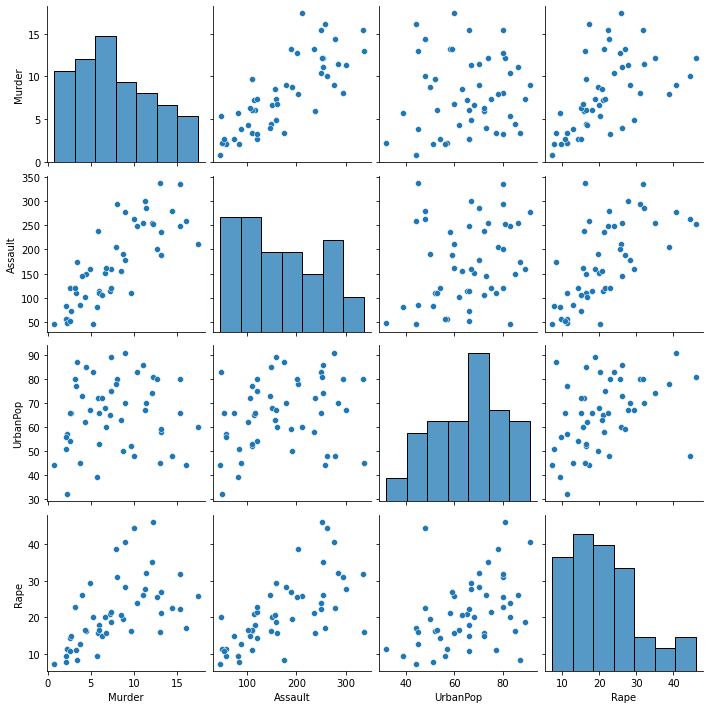

In [12]:
sns.pairplot(crime_data)

<AxesSubplot:>

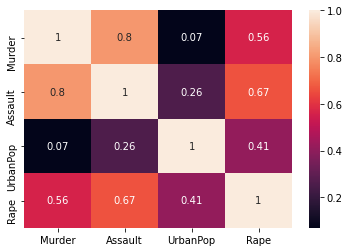

In [13]:
sns.heatmap(crime_data.corr(), annot = True)

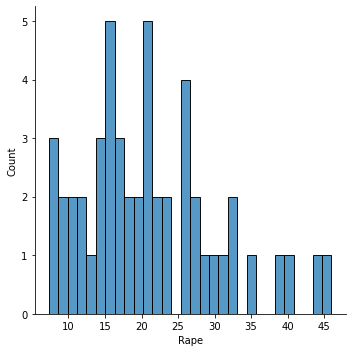

In [14]:
sns.displot(crime_data['Rape'], kde = False, bins = 30)

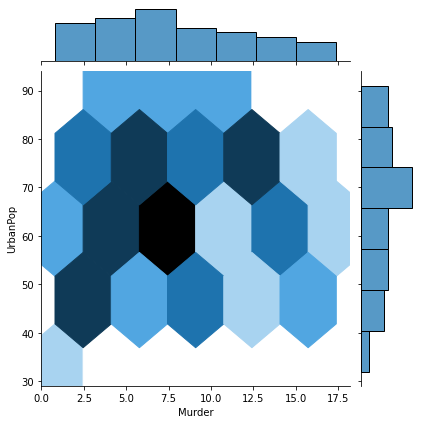

In [15]:
sns.jointplot(x = 'Murder', y = 'UrbanPop', data = crime_data, kind = 'hex')

<AxesSubplot:xlabel='Assault'>

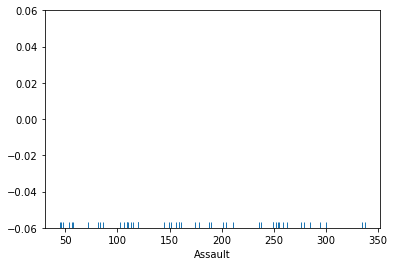

In [16]:
sns.rugplot(crime_data['Assault'])

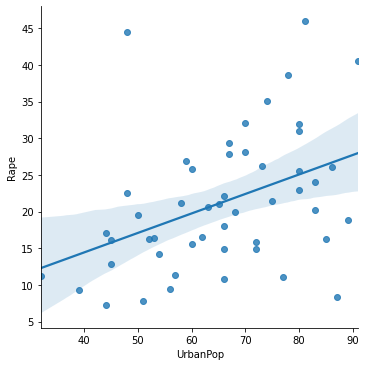

In [17]:
sns.lmplot(x = 'UrbanPop', y = 'Rape', data = crime_data)

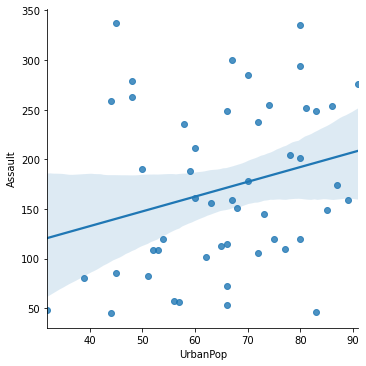

In [18]:
sns.lmplot(x = 'UrbanPop', y = 'Assault', data = crime_data)

## Normalization Function

In [19]:
def norm_func(i):
        x = (i-i.min())/(i.max()-i.min())
        return (x)

In [20]:
df_norm = norm_func(crime_data.iloc[:,1:])

# Hierarchichal Clustering

In [21]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Creating Dendrograms By Using Different Methods

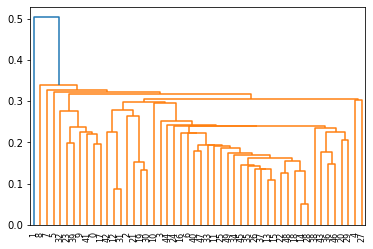

In [22]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single')) # Creating dendrogram using Single Linkage Method

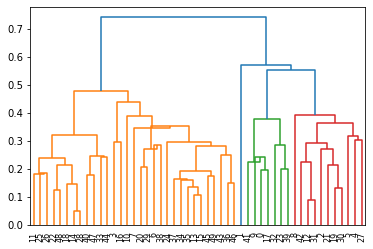

In [23]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid')) # Creating dendogram using Centriod Likage Method

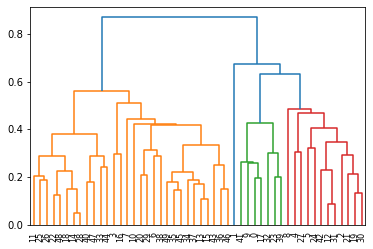

In [24]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average')) # Creating dendogram using Mean Linkage Method

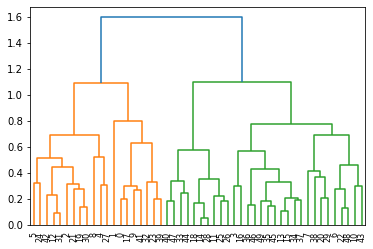

In [25]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete')) # Creating dendogram using Complete Linkage Method

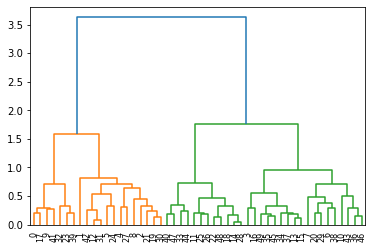

In [26]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward')) # Creating dendogram using Ward Linkage Method ,which is same as Complete linkage method

### Creating Class Instances

In [27]:
hir_clusters = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

### Predicting Clustering Id

In [28]:
hir_clust_prd = hir_clusters.fit_predict(df_norm)
hir_clust_id = pd.DataFrame(hir_clust_prd, columns = ['hir_clust_id'])

In [29]:
hir_clust_id.head()

,hir_clust_id
0,3
1,4
2,1
3,0
4,1


### Creating clusterid column in DataFrame

In [30]:
t_crimedata = crime_data.copy(deep = True)
t_crimedata = pd.concat([hir_clust_id, t_crimedata], axis =1)
t_crimedata

,hir_clust_id,State,Murder,Assault,UrbanPop,Rape
0,3,Alabama,13.2,236,58,21.2
1,4,Alaska,10.0,263,48,44.5
2,1,Arizona,8.1,294,80,31.0
3,0,Arkansas,8.8,190,50,19.5
4,1,California,9.0,276,91,40.6
5,1,Colorado,7.9,204,78,38.7
6,0,Connecticut,3.3,110,77,11.1
7,0,Delaware,5.9,238,72,15.8
8,1,Florida,15.4,335,80,31.9
9,3,Georgia,17.4,211,60,25.8


In [31]:
t_crimedata.groupby(t_crimedata['hir_clust_id']).mean().sort_values(by = 'Murder') # group and sort on cluster

,Murder,Assault,UrbanPop,Rape
hir_clust_id,,,,
2,3.180000,78.700000,49.300000,11.630000
0,5.715000,132.300000,70.800000,18.100000
4,10.000000,263.000000,48.000000,44.500000
1,10.883333,256.916667,78.333333,32.250000
3,14.671429,251.285714,54.285714,21.685714


In [32]:
t_crimedata.groupby(t_crimedata['hir_clust_id']).median().sort_values(by = 'Murder') # group and sort on cluster

,Murder,Assault,UrbanPop,Rape
hir_clust_id,,,,
2,2.40,82.0,52.0,11.25
0,5.95,132.5,70.0,18.40
4,10.00,263.0,48.0,44.50
1,11.20,254.5,80.0,31.45
3,14.40,249.0,58.0,22.20


## Inference:

#### Cluster 2 has lowest crime rate among all clusters, and also this is lowest urban population.

#### Crime rate has directly relationship to the urban population, However cluster 0 has highest crime rate in all categories despite having the low urban population.

#### All types of crime show a postive correlation.

# K-Means Clustering

In [33]:
crime_data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [34]:
from sklearn.cluster import KMeans

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(crime_data.iloc[:,1:])

## Using Elbow Method for finding Optimum clusters

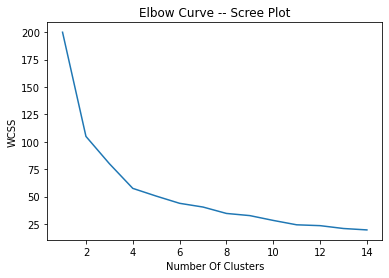

In [36]:
wcss = []                                        # Calcluating TWSS for range of no. of clusters for Elbow Curve
                                                 # TWSS - Total Within-cluster Sum of Square
                                                 # BWSS - Between Within-cluster Sum of Square
for x in range(1,15):                            # WCSS - Within Cluster Sum of Square
    kmeans = KMeans(n_clusters = x, random_state = 0)
    kmeans.fit(scaled_crime_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title('Elbow Curve -- Scree Plot')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
km_clust = KMeans(n_clusters = 5, random_state = 0)
km_clust.fit(scaled_crime_data)

KMeans(n_clusters=5, random_state=0)

### Extracting Clusters Ids for each records

In [38]:
km1_cluster = pd.DataFrame(km_clust.labels_, columns = ['km_clust_id'])
km1_cluster.head()

,km_clust_id
0,0
1,4
2,4
3,3
4,4


### Adding Clusters Ids to the DataFrame and applying sort function

In [39]:
t_crimedata = pd.concat([km1_cluster, t_crimedata], axis = 1)
t_crimedata.sort_values(by = 'km_clust_id')

,km_clust_id,hir_clust_id,State,Murder,Assault,UrbanPop,Rape
0,0,3,Alabama,13.2,236,58,21.2
32,0,3,North Carolina,13.0,337,45,16.1
23,0,3,Mississippi,16.1,259,44,17.1
17,0,3,Louisiana,15.4,249,66,22.2
41,0,3,Tennessee,13.2,188,59,26.9
9,0,3,Georgia,17.4,211,60,25.8
39,0,3,South Carolina,14.4,279,48,22.5
48,1,0,Wisconsin,2.6,53,66,10.8
33,1,2,North Dakota,0.8,45,44,7.3
18,1,2,Maine,2.1,83,51,7.8


In [40]:
t_crimedata.groupby('km_clust_id').mean().sort_values(by = 'Murder') # Apply groupby function based on km_clust_id - mean

,hir_clust_id,Murder,Assault,UrbanPop,Rape
km_clust_id,,,,,
1,1.777778,2.677778,69.888889,49.333333,10.466667
2,0.000000,4.500000,126.333333,83.500000,16.266667
3,0.266667,6.333333,136.400000,64.266667,19.100000
4,1.230769,10.815385,257.384615,76.000000,33.192308
0,3.000000,14.671429,251.285714,54.285714,21.685714


In [41]:
t_crimedata.groupby('km_clust_id').median().sort_values(by = 'Murder') # Apply groupby function based on km_clust_id - median

,hir_clust_id,Murder,Assault,UrbanPop,Rape
km_clust_id,,,,,
1,2.0,2.2,57.0,51.0,10.80
2,0.0,3.9,134.5,84.0,17.55
3,0.0,6.3,120.0,66.0,18.00
4,1.0,11.1,255.0,80.0,31.90
0,3.0,14.4,249.0,58.0,22.20


### Inference:

#### More or less both methods are giving same inferences, expect the ids changes.

#### km_clust_id -4 or hir_clust_id- 2.0 has lowest crime rate among all clusters, and also this has smallest Urban Population.

#### Crime rate has directly relation with Urban Population, km_clust_id 3/ hir_clust_id 1 has highest crime rate in all catrgories  spite of having low Urban Population.

#### All types of Crime show a postive correlation. 

# DBSCAN Clustering

In [42]:
crime_data.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [43]:
crime_data.drop(['State'], axis =1, inplace = True)  # Drop State to create an array

In [44]:
array = crime_data.values    # Creating an array out of DataFrame for only numeric values

In [45]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [46]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [47]:
scaler = StandardScaler().fit(array)      ## Creating scaler class instences
v = scaler.transform(array)               ## Fitting to it on array
v                                         ## Displaying standardized array

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [48]:
scaler1 = StandardScaler()     ### Both fit_transform give ,fit and Transform give us same result.
x = scaler1.fit_transform(array)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [49]:
d_bscan = DBSCAN(eps = 1.2, min_samples = 6)          ### Creating DBSCAN class ------- testing with various episolen and minpoints
d_bscan.fit(v)                                        ### For optium clustering calculation.....after various combinations of epi of 1.2
print(d_bscan.labels_)                                ### min_sample of 5 is optimal with Silhouette Coffecient value is 0.386

print('Silhouette Coffecient: %0.3f'%  metrics.silhouette_score(v, d_bscan.labels_))

[-1 -1 -1  0 -1 -1  0  0 -1 -1  0  0 -1  0  0  0  0 -1  0 -1  0 -1  0 -1
  0  0  0 -1  0  0 -1 -1 -1  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0
  0  0]
Silhouette Coffecient: 0.386


In [50]:
d_bscan.get_params()

{'algorithm': 'auto',
 'eps': 1.2,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 6,
 'n_jobs': None,
 'p': None}

In [51]:
db_clust = pd.DataFrame(d_bscan.labels_, columns = ['d_bscan_id'])
db_clust.head()

,d_bscan_id
0,-1
1,-1
2,-1
3,0
4,-1


In [52]:
t_crimedata = pd.concat([db_clust, t_crimedata], axis = 1)
t_crimedata

,d_bscan_id,km_clust_id,hir_clust_id,State,Murder,Assault,UrbanPop,Rape
0,-1,0,3,Alabama,13.2,236,58,21.2
1,-1,4,4,Alaska,10.0,263,48,44.5
2,-1,4,1,Arizona,8.1,294,80,31.0
3,0,3,0,Arkansas,8.8,190,50,19.5
4,-1,4,1,California,9.0,276,91,40.6
5,-1,4,1,Colorado,7.9,204,78,38.7
6,0,2,0,Connecticut,3.3,110,77,11.1
7,0,3,0,Delaware,5.9,238,72,15.8
8,-1,4,1,Florida,15.4,335,80,31.9
9,-1,0,3,Georgia,17.4,211,60,25.8


In [53]:
t_crimedata.sort_values(by = 'd_bscan_id')

,d_bscan_id,km_clust_id,hir_clust_id,State,Murder,Assault,UrbanPop,Rape
0,-1,0,3,Alabama,13.2,236,58,21.2
32,-1,0,3,North Carolina,13.0,337,45,16.1
27,-1,4,1,Nevada,12.2,252,81,46.0
23,-1,0,3,Mississippi,16.1,259,44,17.1
21,-1,4,1,Michigan,12.1,255,74,35.1
19,-1,4,1,Maryland,11.3,300,67,27.8
17,-1,0,3,Louisiana,15.4,249,66,22.2
39,-1,0,3,South Carolina,14.4,279,48,22.5
31,-1,4,1,New York,11.1,254,86,26.1
41,-1,0,3,Tennessee,13.2,188,59,26.9


In [54]:
t_crimedata.groupby('d_bscan_id').median().sort_values(by = 'Murder')

,km_clust_id,hir_clust_id,Murder,Assault,UrbanPop,Rape
d_bscan_id,,,,,,
0,3,0.0,5.10,114.0,66.0,16.30
-1,4,1.0,12.15,257.0,68.5,27.35


In [55]:
t_crimedata.groupby('km_clust_id').median().sort_values(by = 'Murder')

,d_bscan_id,hir_clust_id,Murder,Assault,UrbanPop,Rape
km_clust_id,,,,,,
1,0.0,2.0,2.2,57.0,51.0,10.80
2,0.0,0.0,3.9,134.5,84.0,17.55
3,0.0,0.0,6.3,120.0,66.0,18.00
4,-1.0,1.0,11.1,255.0,80.0,31.90
0,-1.0,3.0,14.4,249.0,58.0,22.20


In [56]:
t_crimedata.groupby('hir_clust_id').median().sort_values(by = 'Murder')

,d_bscan_id,km_clust_id,Murder,Assault,UrbanPop,Rape
hir_clust_id,,,,,,
2,0.0,1,2.40,82.0,52.0,11.25
0,0.0,3,5.95,132.5,70.0,18.40
4,-1.0,4,10.00,263.0,48.0,44.50
1,-1.0,4,11.20,254.5,80.0,31.45
3,-1.0,0,14.40,249.0,58.0,22.20


### Inferences:

#### DBSCAN not properly with small dataset. It has divided data sets in two groups that is outliers and other valid groups.

#### While KMeans and Hirarchical Clustering gives almost same results. Mean and Median very simalar to distinct groups. 

### Final Inferences:

#### KMeans and Hirarchical Clustering Methods predicted one cluster with low crime rate. 